PROCESS IN SQL IN CLEANING DATA

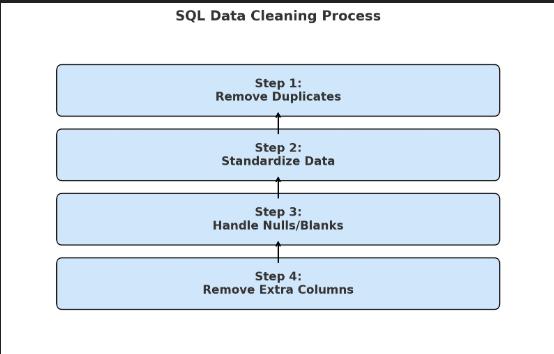


1. Remove Duplicates

2. Standardize Data (fix spaces, typos, formats)

3. Handle Nulls/Blanks (fill or delete missing data)

4. Remove Extra Columns

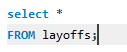

-----------------------------------------------------------------------------------------------------------------------------

-- NOW THAT WE UNDERSTAND THE RAW DATASET AND ITS VARIABLES, WE SHOULD NOW CREATE A DUPLICATE TABLE FOR US TO DO THE NECESSARY CLEANING (IT IS A GOOD PRACTICE FOR US TO CRATE A NEW TABLE SO THAT WE DONT ALTER THE RAW DATA ITSELF)--

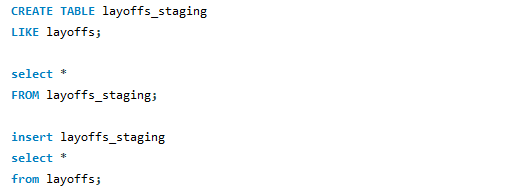

!!! CODE EXPLANATION !!!

-- This creates a new empty table called layoffs_staging that has the same structure (same columns, same data types, same indexes) as the existing layoffs table. Think of it as making an empty mold or template of the layoffs table, without copying any of its data yet. --
    

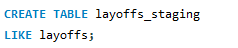



-- This selects and shows all the rows from the layoffs_staging table. Since you just created it and haven’t inserted anything yet, this will return an empty table (no rows) --


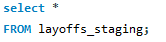



-- This copies all the data from the layoffs table into the new layoffs_staging table.

It’s like saying: “Take everything from layoffs and paste it into layoffs_staging.”

Now your staging table is a full duplicate of the original layoffs table --


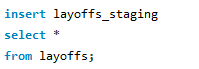

-- This assigns a row number to each row within groups of duplicates.

If two rows are exactly the same (same company, same date, same location, etc.), the first one gets row_num = 1, the second gets row_num = 2, etc.

This helps us mark duplicates --

row_number() over(...)


-- This shows you all the duplicate rows (where row_num is bigger than 1). You keep the first occurrence, and mark the rest as duplicates --
with duplicate_cte as (...)
select *
from duplicate_cte
where row_num > 1;


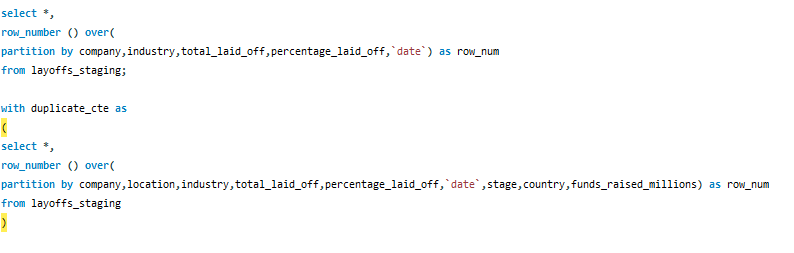

-- Now you delete all duplicates, keeping only the first row in each group. After this step, your dataset has no duplicates --
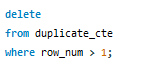

STEP 2 - STANDARDIZING DATA

update layoffs_staging2 set company = trim(company);

Removes unwanted spaces before or after company names.

“Google ” → “Google”

---------------------------------------------------------------------------------------
update layoffs_staging2

set industry = 'Crypto'

where industry like 'Crypto%';

---------------------------------------------------------------------------------------
Standardizes similar values.

“Crypto currency” → “Crypto”

“Cryptotech” → “Crypto”

---------------------------------------------------------------------------------------
update layoffs_staging2
set country = trim(trailing '.' from country)
where country like 'United States%';

---------------------------------------------------------------------------------------
fixes typos or extra characters.

“United States.” → “United States”

-------------------------------------------------------------------------------------=
update layoffs_staging2

set `date` = str_to_date(`date`,'%m/%d/%Y');

alter table layoffs_staging2 modify column `date` DATE;


********Converts messy text dates into real SQL DATE format.********

“12/15/2022” → 2022-12-15

 ********After this step, your dataset has clean & consistent values.********

-------------------------------------------------------------------------------------
STEP 3 – Handling Null or Blank Values
-------------------------------------------------------------------------------------

select *
from layoffs_staging2
where industry is null or industry = '';

********Finds missing industries********

update layoffs_staging2 t1
join layoffs_staging2 t2
  on t1.company = t2.company
set t1.industry = t2.industry
where t1.industry is null
and t2.industry is not null;


********Fills missing industries by looking at other rows from the same company. If one Airbnb row has “Travel” but another is blank → fill in “Travel”.********

delete 
from layoffs_staging2
where total_laid_off is null
and percentage_laid_off is null;


********Removes rows that are completely useless (no layoff info). After this step, your dataset has fewer blanks & no junk rows.********


STEP 4 – Remove Helper Columns
-------------------------------------------------------------------------------------

alter table layoffs_staging2

drop column row_num;


Finally, you drop the helper column (row_num) because you don’t need it anymore.
Now your table is clean, consistent, and duplicate-free.